<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/hierachical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs #librería para generar nuestro dataset
from sklearn.cluster import AgglomerativeClustering #librería para ejecutar clustering gerárquico aglomerativo
from sklearn.metrics import silhouette_score  # para medir el performance del clustering
from scipy.cluster.hierarchy import dendrogram, linkage #para visualizar dendrograma

## Preparando datos de prueba

In [51]:
# Generamos datos en dos dimensiones (features) y centroides
# X tiene los datos en dos dimensiones
# y tiene el cluster al que pertenece cada par de datos
# c tiene los centroides

X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# Generamos dataframe con los datos de dos dimensiones
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

In [52]:
print(X.shape)
print(y.shape)
print(c.shape)
print(df_blobs.shape)
print(df_centers.shape)

(500, 2)
(500,)
(4, 2)
(500, 3)
(4, 2)


## Visualización de datos

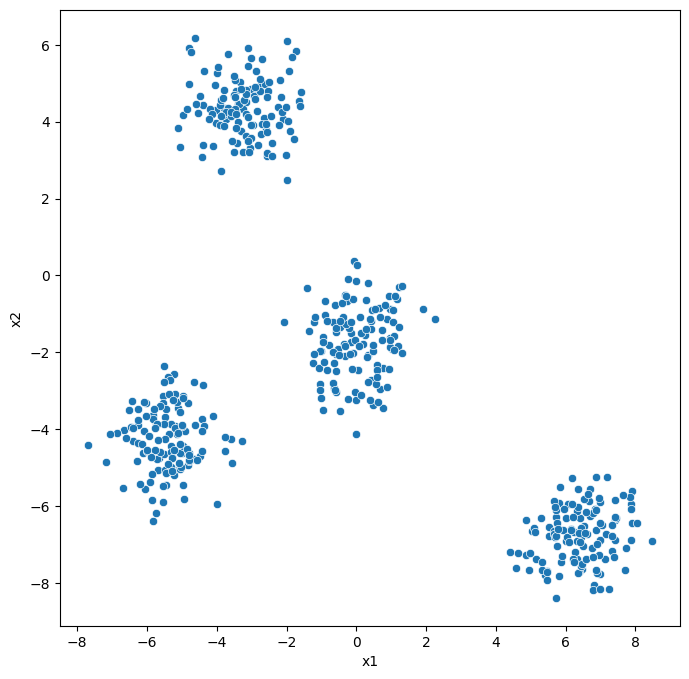

In [53]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

## Dendrograma y hierarchical clustering

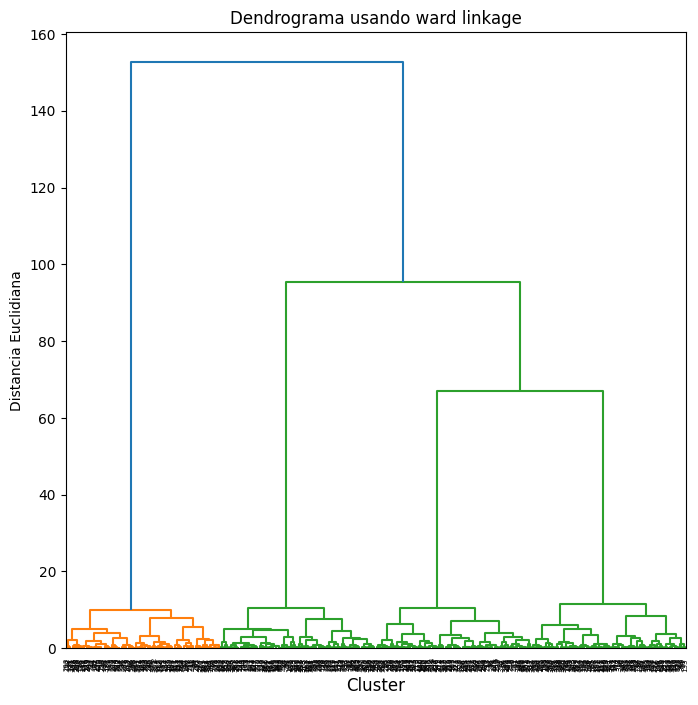

In [54]:
fig = plt.figure(figsize=(8,8))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

# La gráfica arroja que para 4, 3 y 2 clústers son buenos candidatos, porque están bien separados

In [63]:
# Aplicamos hirarquical cluster aglomerativo
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [64]:
y_hc

array([1, 2, 3, 1, 1, 1, 3, 3, 1, 1, 0, 3, 1, 2, 2, 2, 1, 3, 3, 0, 0, 1,
       2, 0, 3, 3, 3, 3, 2, 0, 0, 3, 1, 3, 1, 1, 2, 2, 0, 0, 1, 3, 2, 3,
       2, 2, 3, 3, 3, 0, 2, 0, 3, 0, 1, 2, 1, 3, 0, 0, 0, 2, 3, 3, 3, 0,
       0, 1, 0, 0, 1, 1, 0, 3, 2, 3, 1, 1, 3, 2, 0, 2, 0, 1, 2, 0, 0, 1,
       0, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 2, 0, 2, 3, 0, 3, 1, 0, 1, 0, 0,
       0, 0, 2, 3, 0, 3, 1, 0, 3, 0, 0, 1, 2, 2, 0, 2, 3, 1, 3, 2, 2, 0,
       1, 0, 2, 0, 3, 0, 1, 0, 3, 3, 1, 0, 0, 3, 1, 0, 2, 1, 3, 1, 3, 0,
       0, 0, 1, 3, 0, 2, 2, 2, 0, 3, 1, 1, 0, 2, 2, 3, 3, 2, 3, 3, 0, 2,
       1, 1, 2, 0, 1, 2, 3, 3, 2, 3, 1, 0, 1, 1, 3, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 2, 3, 2, 3, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 1,
       3, 1, 2, 0, 1, 3, 2, 2, 1, 1, 3, 1, 2, 3, 3, 2, 2, 0, 0, 3, 1, 0,
       2, 1, 1, 0, 3, 0, 3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 3, 3, 3, 2, 1, 2, 0, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 1, 0,
       1, 3, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 1, 0,

In [65]:
df_blobs['cluster_predict'] = y_hc

In [66]:
df_blobs.shape

(500, 4)

In [67]:
df_blobs.head()

,x1,x2,y,cluster_predict
0,-5.678771,-5.066108,2,1
1,-4.018164,4.312086,3,2
2,6.170330,-5.262246,0,3
3,-4.812387,-4.936539,2,1
4,-5.113395,-3.451580,2,1


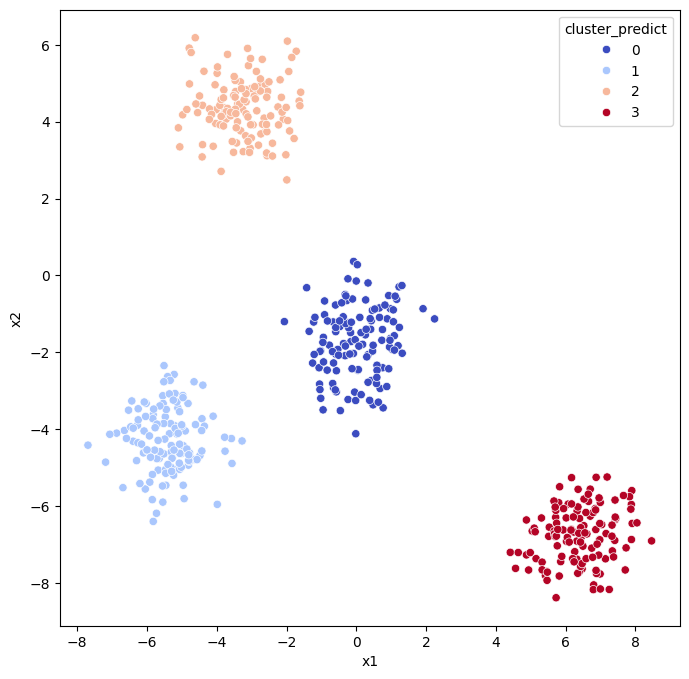

In [68]:
#graficamos los datos discriminando por los 4 clusters de la predicción

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster_predict', palette='coolwarm')
plt.show()

In [69]:
# si hubiéramos elegido 3 clusters
# Aplicamos hirarquical cluster aglomerativo
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [70]:
df_blobs['cluster_predict'] = y_hc

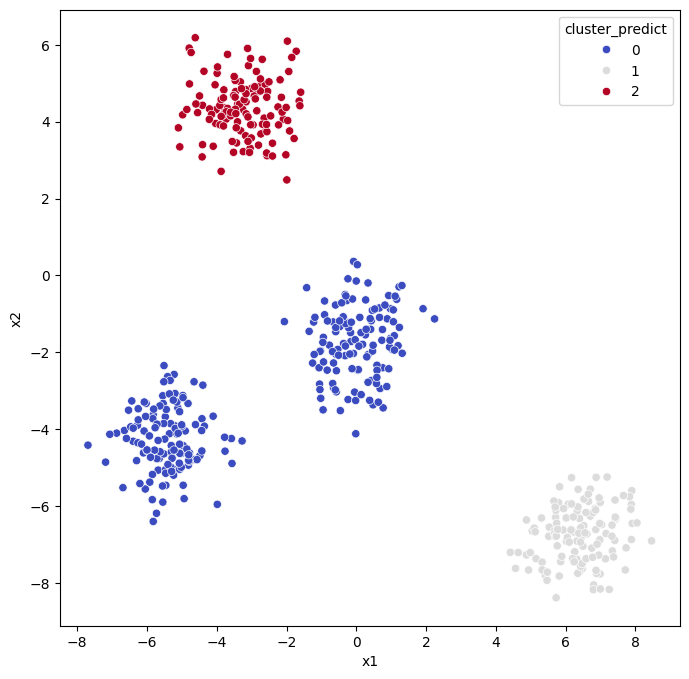

In [71]:
#graficamos los datos discriminando por los 3 clusters de la predicción

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster_predict', palette='coolwarm')
plt.show()

## Evaluación de hierarchical clustering

In [72]:
# Volvemos a generar hierarquical cluster aglomerativo de 4 clusters

# Aplicamos hirarquical cluster aglomerativo con 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [73]:
df_blobs['cluster_predict'] = y_hc

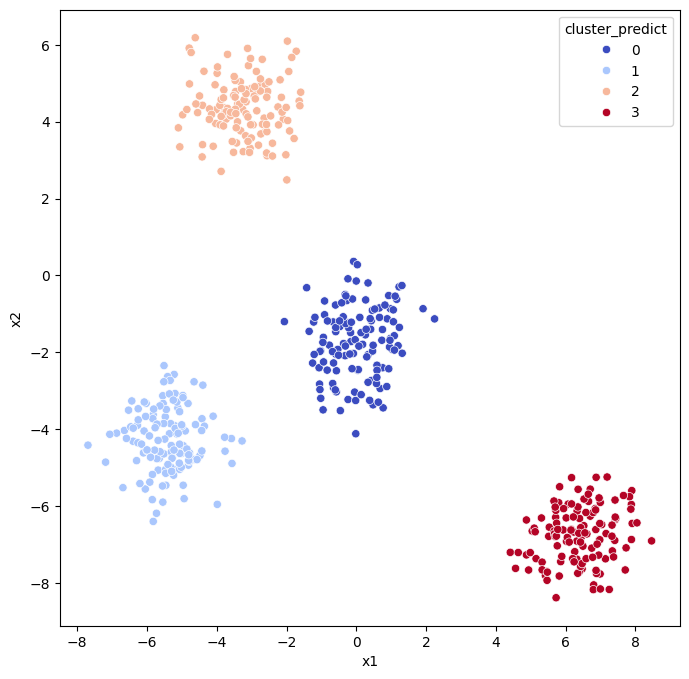

In [74]:
#graficamos los datos discriminando por los 4 clusters de la predicción

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster_predict', palette='coolwarm')
plt.show()

In [75]:
# calculamos coeficiente de silueta
silhouette_score(X,y_hc)

0.7834960329193968

For n_clusters = 4 The average silhouette_score is : 0.7834960329193968


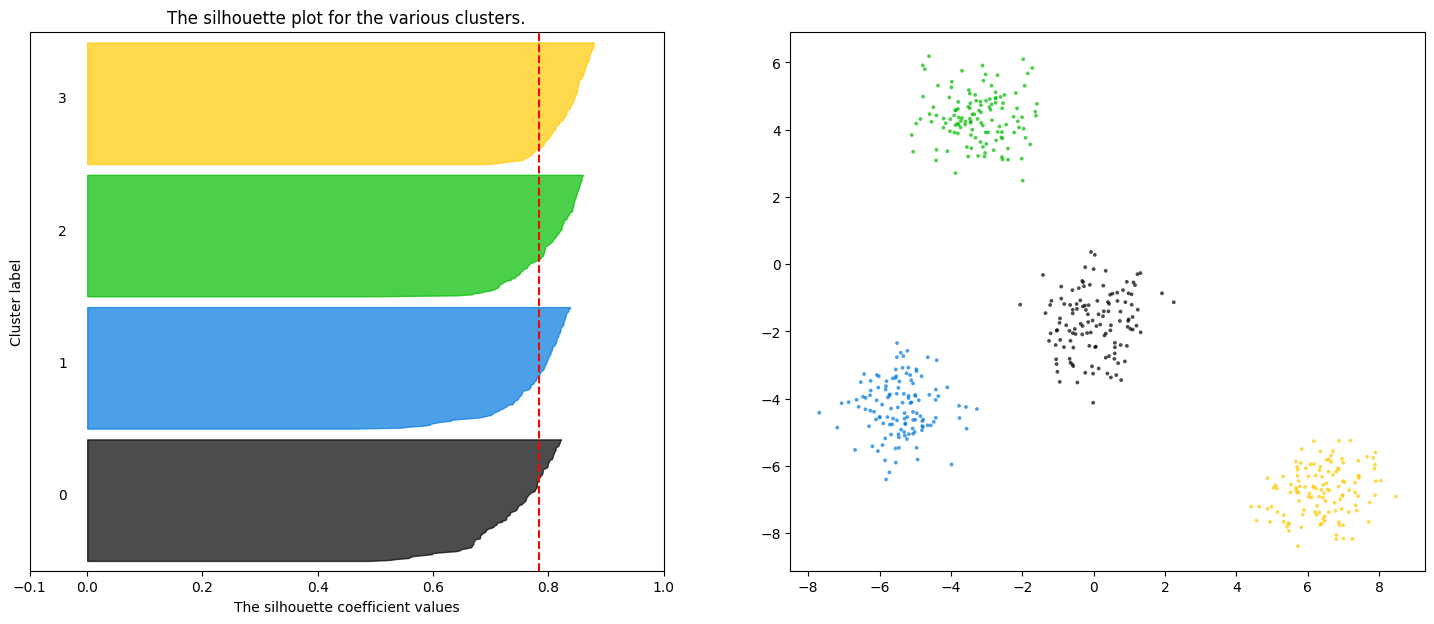

In [76]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


plt.show()

For n_clusters = 3 The average silhouette_score is : 0.6743408706491352
For n_clusters = 4 The average silhouette_score is : 0.7834960329193968
For n_clusters = 5 The average silhouette_score is : 0.6689051802393062


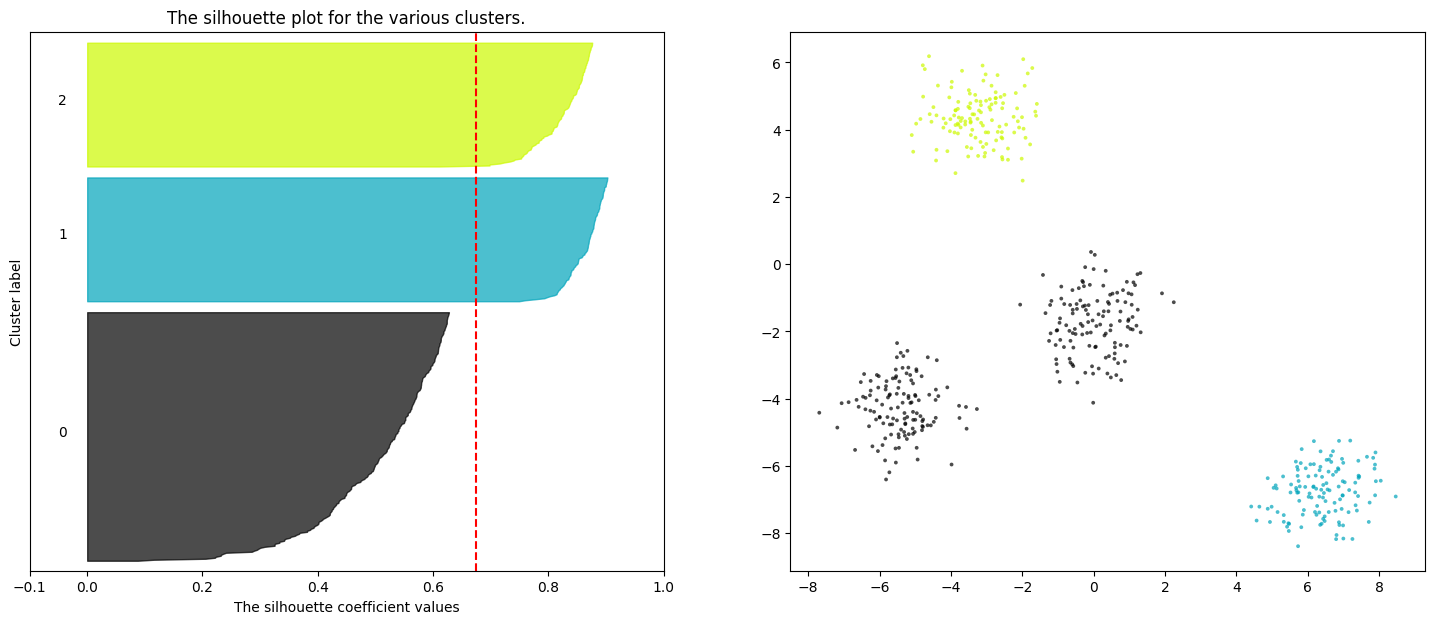

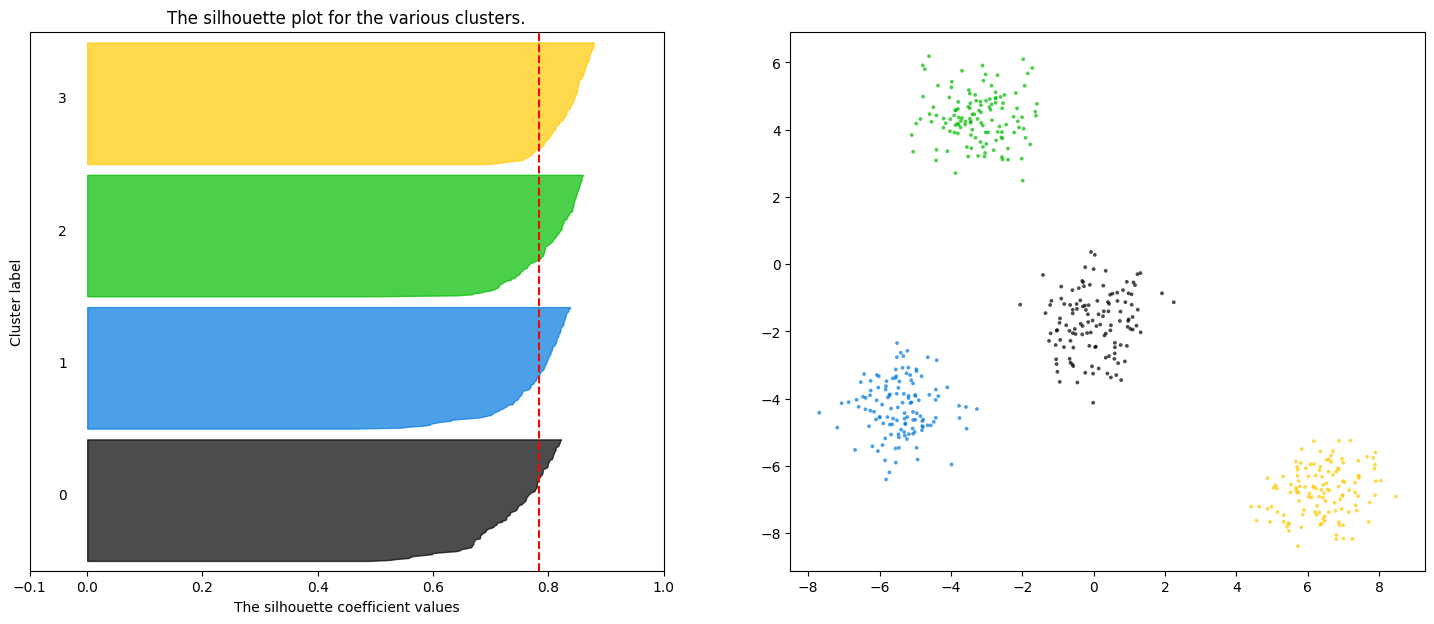

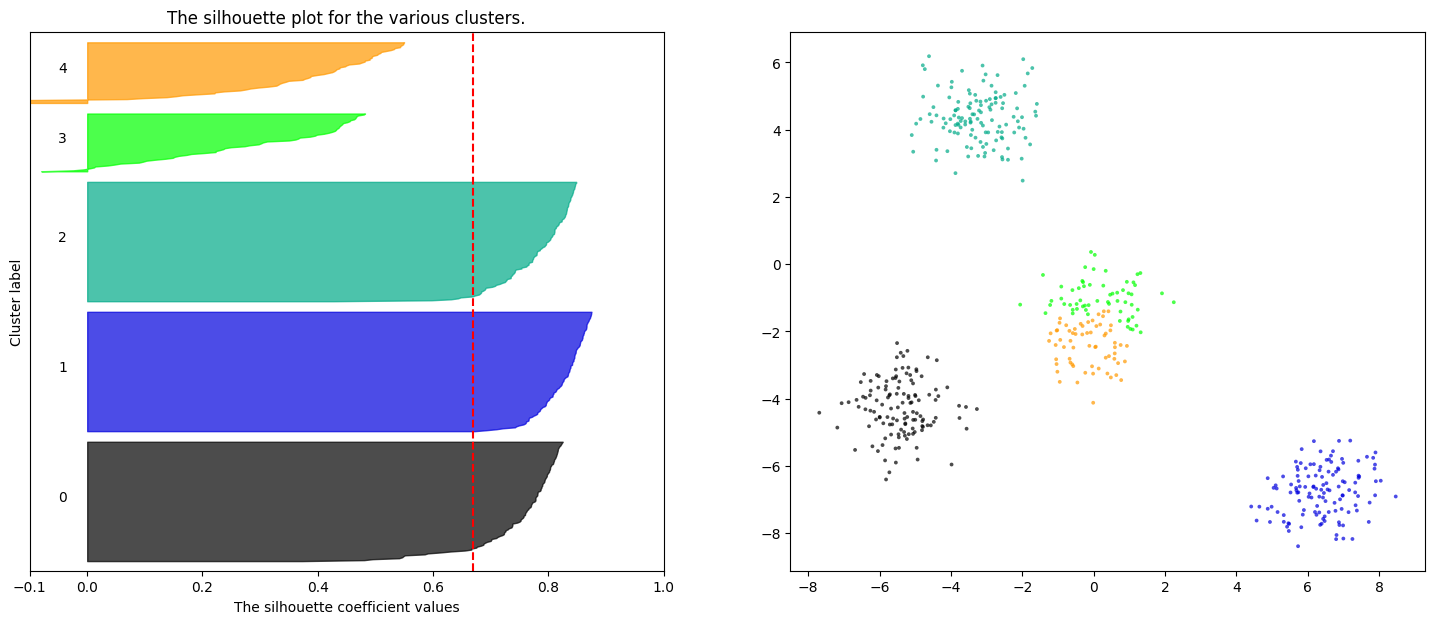

In [77]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


plt.show()